In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

from pymdp import maths, utils
from pymdp.maths import spm_log_single as log_stable # @NOTE: we use the `spm_log_single` helper function from the `maths` sub-library of pymdp. This is a numerically stable version of np.log()
from pymdp import control
from pymdp.envs import GridWorldEnv
from pymdp.agent import Agent

In [21]:
state_mapping = {0: (0,0), 1: (1,0), 2: (2,0), 3: (0,1), 4: (1,1), 5:(2,1), 6: (0,2), 7:(1,2), 8:(2,2)}

A = np.eye(9)
def plot_beliefs(Qs, title=""):
    #values = Qs.values[:, 0]
    plt.grid(zorder=0)
    plt.bar(range(Qs.shape[0]), Qs, color='r', zorder=3)
    plt.xticks(range(Qs.shape[0]))
    plt.title(title)
    plt.show()
    
labels = [state_mapping[i] for i in range(A.shape[1])]
def plot_likelihood(A):
    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(A, xticklabels = labels, yticklabels = labels, cbar = False)
    plt.title("Likelihood distribution (A)")
    plt.show()
    
def plot_empirical_prior(B):
    fig, axes = plt.subplots(3,2, figsize=(8, 10))
    actions = ['UP', 'RIGHT', 'DOWN', 'LEFT', 'STAY']
    count = 0
    for i in range(3):
        for j in range(2):
            if count >= 5:
                break
                
            g = sns.heatmap(B[:,:,count], cmap="OrRd", linewidth=2.5, cbar=False, ax=axes[i,j])

            g.set_title(actions[count])
            count += 1
    fig.delaxes(axes.flatten()[5])
    plt.tight_layout()
    plt.show()
    
def plot_transition(B):
    fig, axes = plt.subplots(2,3, figsize = (15,8))
    a = list(actions.keys())
    count = 0
    for i in range(dim-1):
        for j in range(dim):
            if count >= 5:
                break 
            g = sns.heatmap(B[:,:,count], cmap = "OrRd", linewidth = 2.5, cbar = False, ax = axes[i,j], xticklabels=labels, yticklabels=labels)
            g.set_title(a[count])
            count +=1 
    fig.delaxes(axes.flatten()[5])
    plt.tight_layout()
    plt.show()

In [22]:
env = GridWorldEnv(shape=[3,3])

In [23]:
A = env.get_likelihood_dist()
B = env.get_transition_dist()

In [24]:
A.shape, B.shape

((9, 9), (9, 9, 5))

In [25]:
B_f = utils.to_obj_array(B)
B_f.shape
B[0].shape
# num_controls = [B_f[f].shape[2] for f in range(env.n_states)]
# num_controls

(9, 5)

In [26]:
labels = [state_mapping[i] for i in range(A.shape[1])]
def plot_likelihood(A):
    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(A, xticklabels = labels, yticklabels = labels, cbar = False)
    plt.title("Likelihood distribution (A)")
    plt.show()

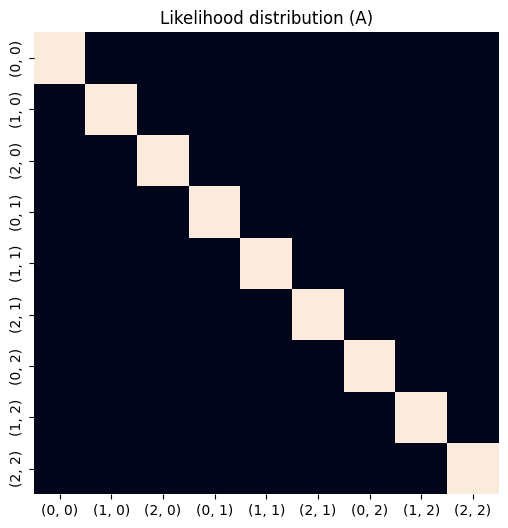

In [27]:
plot_likelihood(A)

In [28]:
actions = {'UP':0, 'RIGHT':1, 'DOWN':2, 'LEFT':3, 'STAY':4}
dim = 3

In [29]:
obs = env.reset(0)
obs = [obs]

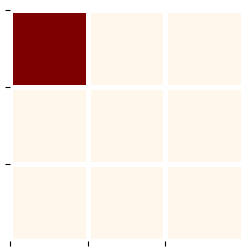

In [30]:
env.render()

In [31]:
# C = np.zeros(env.n_states)
C = utils.obj_array_zeros([env.n_states])
C[0][7] = 1

In [32]:
agent = Agent(A=A, B=B, C=C, policy_len=3)

In [33]:
num_obs = [env.n_observations]
C_test = utils.obj_array_zeros([5])

In [34]:
C_test[0]

array([0., 0., 0., 0., 0.])

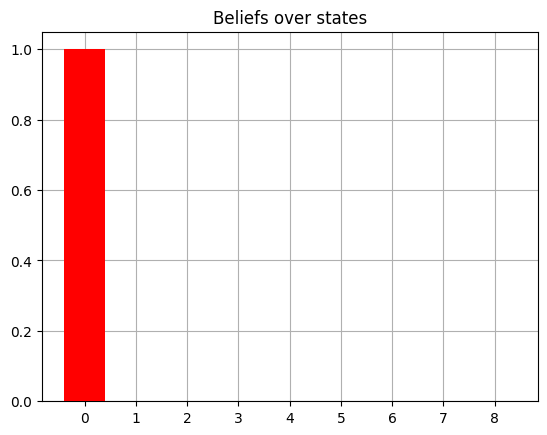

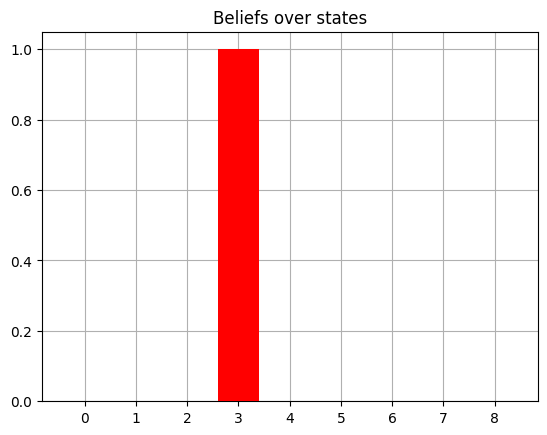

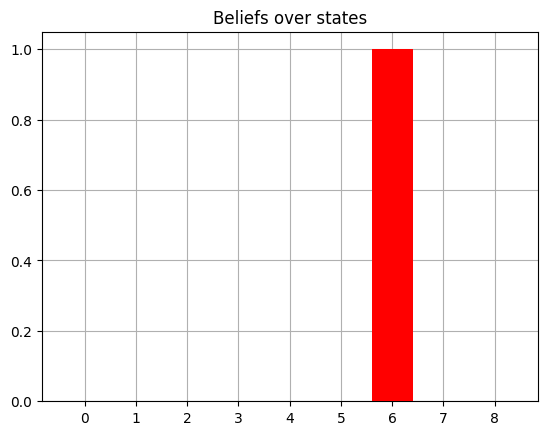

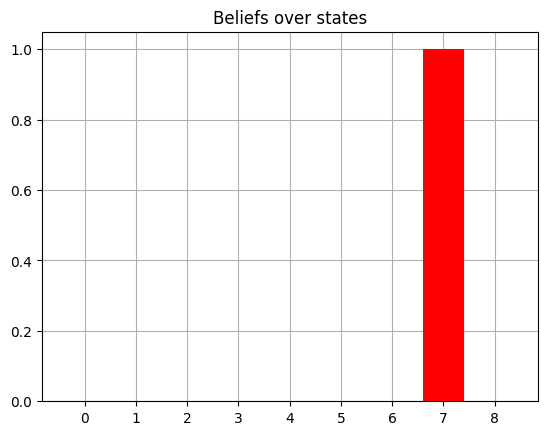

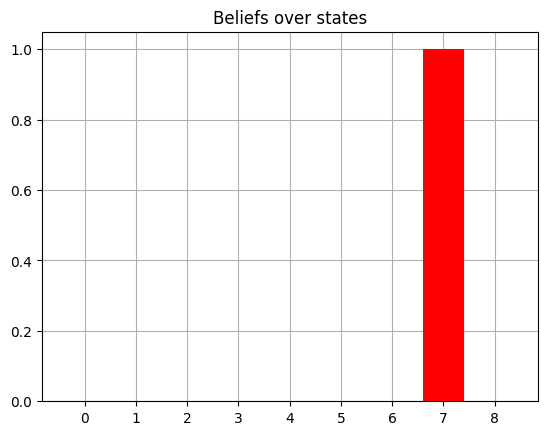

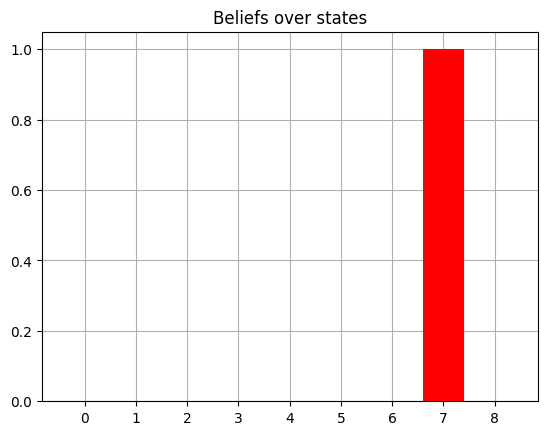

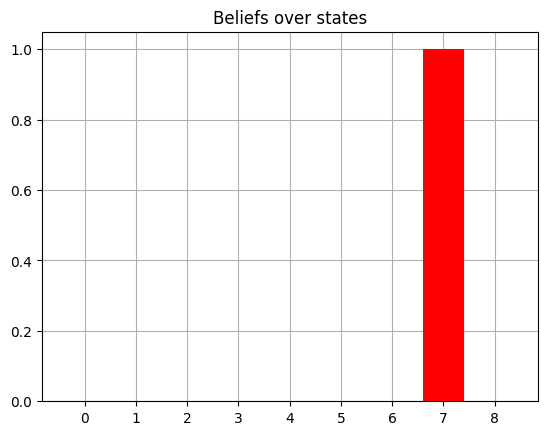

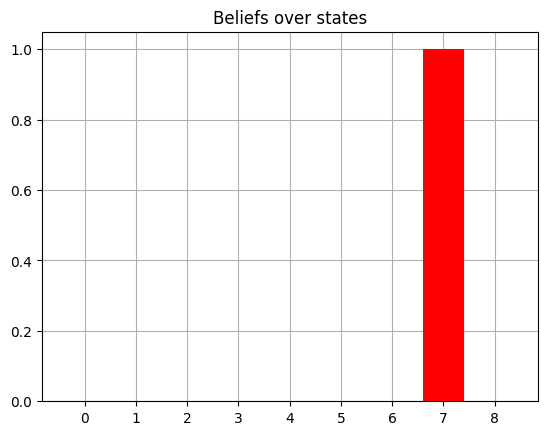

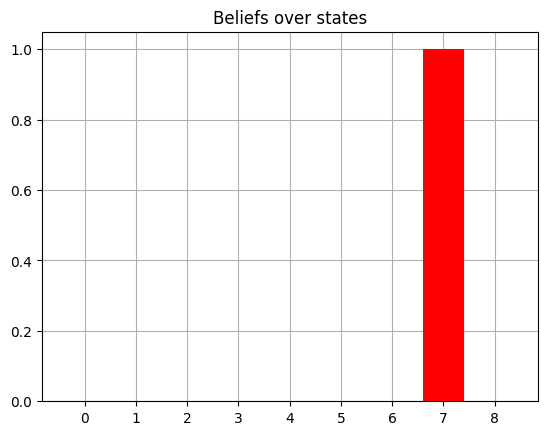

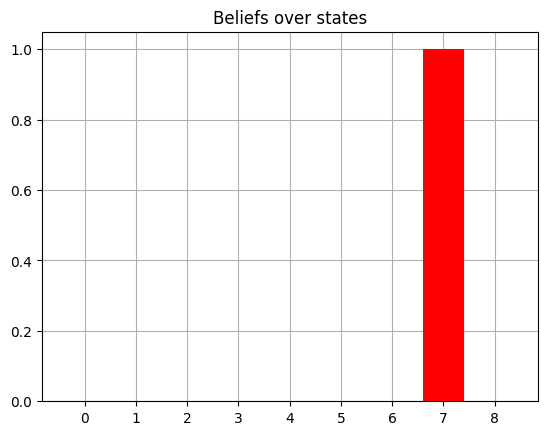

In [35]:
for t in range(10):
    qs = agent.infer_states(obs)
    plot_beliefs(qs[0], title="Beliefs over states")
    agent.infer_policies()
    action = agent.sample_action()
    
    obs = env.step(action[0])
    obs = [obs]

In [36]:
qs = agent.infer_states(obs)

In [37]:
agent.infer_policies()

(array([1.78145450e-22, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.58302016e-15, 1.58302016e-15,
        1.40668921e-08, 1.58302016e-15, 1.40668921e-08, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.58302016e-15, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.58302016e-15, 1.78145450e-22, 1.78145450e-22,
        1.78145450e-22, 1.78145450e-22, 1.58302016e-15, 1.78145450e-22,
        1.58302016e-15, 1.58302016e-15, 1.40668921e-08, 1.58302016e-15,
        1.40668921e-08, 1.78145450e-22, 1.78145450e-22, 1.78145450e-22,
        1.58302016e-15, 1.78145450e-22, 1.58302016e-15, 1.58302016e-15,
        1.40668921e-08, 1.58302016e-15, 1.58302016e-15, 1.583020

In [38]:
a=agent.sample_action()